In [1]:
#part1: separación entre reciclable y orgánica
#https://www.kaggle.com/yannick09/waste-classification

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from PIL import Image
import numpy as np

#carga de datos y prprocesamiento

Using TensorFlow backend.


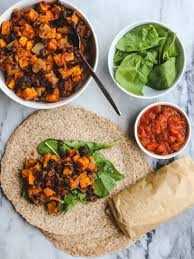

In [2]:
Image.open('DATASET/TEST/O/O_13191.jpg')

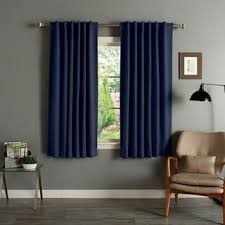

In [3]:
Image.open('DATASET/TEST/R/R_10045.jpg')

In [4]:
# preprocesamiento de imgs

datagen_tr = ImageDataGenerator( rescale = 1./255)
datagen_ts = ImageDataGenerator( rescale = 1./255)

In [5]:
data_tr = datagen_tr.flow_from_directory('DATASET/TRAIN', target_size = (128, 128), batch_size = 32, class_mode = 'binary')

data_ts = datagen_ts.flow_from_directory('DATASET/TEST', target_size = (128, 128), batch_size = 32, class_mode = 'binary')

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [6]:
print(data_tr)

In [7]:
#modelo 1: sacado del desafío de keras


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (128,128, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(units = 30, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 28800)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 30)                864030    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [8]:
#train 1

history = model.fit_generator(data_tr, steps_per_epoch = 300, verbose=True,epochs = 5, validation_data = data_ts, validation_steps = 100)

Epoch 1/5
300/300 [==============================] - 80s 267ms/step - loss: 0.4347 - accuracy: 0.8122 - val_loss: 0.4057 - val_accuracy: 0.8185
Epoch 2/5
300/300 [==============================] - 81s 272ms/step - loss: 0.4104 - accuracy: 0.8224 - val_loss: 0.3234 - val_accuracy: 0.8769
Epoch 3/5
300/300 [==============================] - 81s 272ms/step - loss: 0.3787 - accuracy: 0.8352 - val_loss: 0.3217 - val_accuracy: 0.8776
Epoch 4/5
300/300 [==============================] - 80s 266ms/step - loss: 0.3604 - accuracy: 0.8464 - val_loss: 0.1832 - val_accuracy: 0.8874
Epoch 5/5
300/300 [==============================] - 81s 272ms/step - loss: 0.3380 - accuracy: 0.8556 - val_loss: 0.4351 - val_accuracy: 0.8845


Text(0.5, 1.0, 'Accuracy Curves')

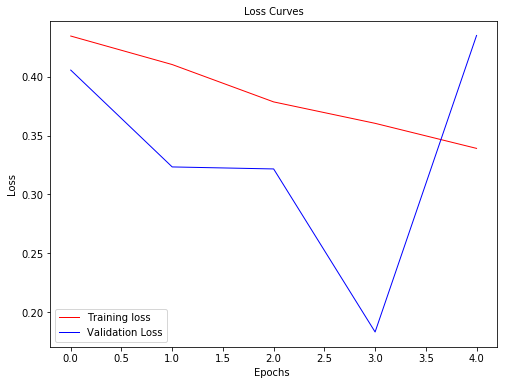

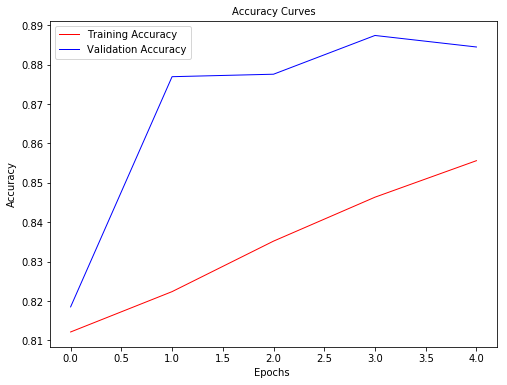

In [10]:
#Gráfico de loss del modelo 1 (comparación de conjunto de validación con el de entrenamiento)
import matplotlib.pyplot as plt

plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=1.0)
plt.plot(history.history['val_loss'],'b',linewidth=1.0)
plt.legend(['Training loss', 'Validation Loss'])
plt.xlabel('Epochs ',fontsize=10)
plt.ylabel('Loss',fontsize=10)
plt.title('Loss Curves',fontsize=10)


#Gráfico de accuracy del modelo 1 (comparación de conjunto de validación con el de entrenamiento)

plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=1.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=1.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.xlabel('Epochs ',fontsize=10)
plt.ylabel('Accuracy',fontsize=10)
plt.title('Accuracy Curves',fontsize=10)


In [ ]:
confusion_mtx = confusion_matrix(y_test, predicted_classes) 

plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('confusion_matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['R','O'], rotation=90)
plt.yticks(tick_marks, ['R','O'])
#Following is to mention the predicated numbers in the plot and highligh the numbers the most predicted number for particular label
thresh = confusion_mtx.max() / 2.
for i, j in itertools.product(range(confusion_mtx.shape[0]), range(confusion_mtx.shape[1])):
    plt.text(j, i, confusion_mtx[i, j],
    horizontalalignment="center",
    color="white" if confusion_mtx[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')